In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [11]:

# Function to normalize features
def normalize_features(X):
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_normalized


In [12]:

# Function to initialize parameters
def initialize_parameters(n_features):
    theta = np.zeros((n_features, 1))
    return theta


In [13]:

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta


In [14]:

# Function to predict labels
def predict(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    predictions = (h >= 0.5).astype(int)
    return predictions


In [15]:

# Read Titanic dataset from CSV
titanic_data = pd.read_csv('Titanic-Dataset.csv')



In [16]:

# Handle missing values if any
titanic_data.fillna(0, inplace=True)  # Filling missing values with 0, you can choose other strategies as well


In [17]:

# Split dataset into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived'].values.reshape(-1, 1)


In [19]:
# Select numeric columns for normalization
numeric_columns = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_columns]

# Normalize features
X_normalized = normalize_features(X_numeric)



In [20]:

# Add intercept term
X_normalized['Intercept'] = 1


In [21]:

# Initialize parameters
n_features = X_normalized.shape[1]
theta = initialize_parameters(n_features)


In [22]:

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000


In [23]:

# Perform gradient descent
theta = gradient_descent(X_normalized.values, y, theta, learning_rate, num_iterations)


In [24]:

# Predict on the training set
predictions = predict(X_normalized.values, theta)


In [25]:

# Calculate accuracy
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)


Accuracy: 0.6936026936026936


In [28]:
df = pd.read_csv("Titanic-Dataset.csv")

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df["PassengerId"].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

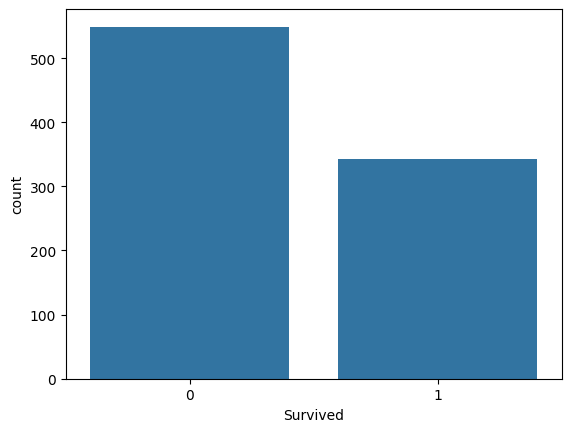

In [31]:
sns.countplot(x=df['Survived'])

In [32]:
df["Pclass"].unique()

array([3, 1, 2])

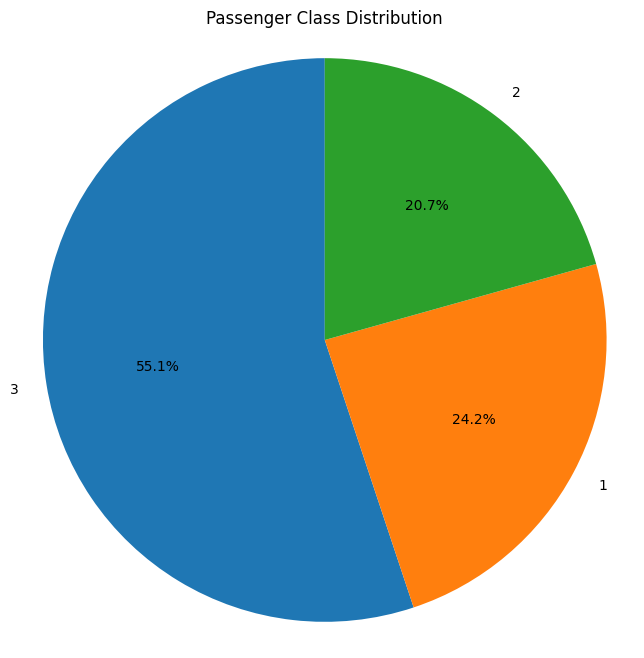

In [33]:
class_counts = df['Pclass'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Passenger Class Distribution')
plt.show()

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

<Axes: xlabel='Sex', ylabel='count'>

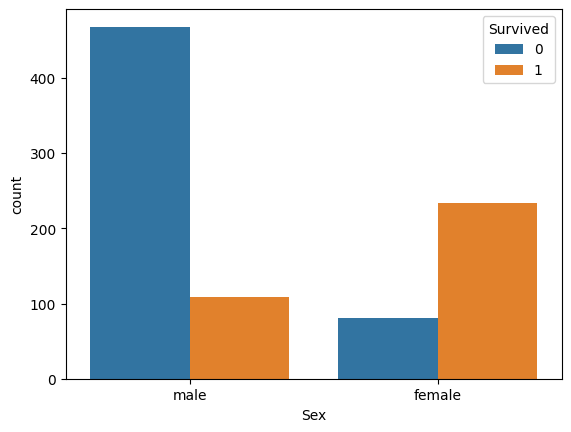

In [39]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

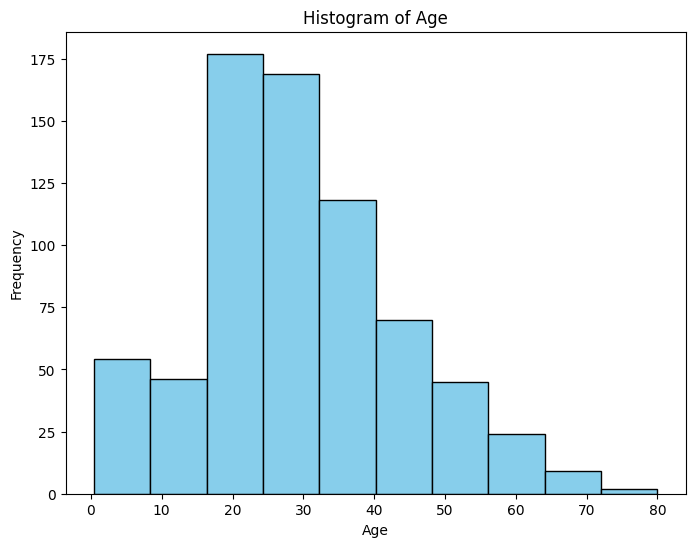

In [41]:
# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

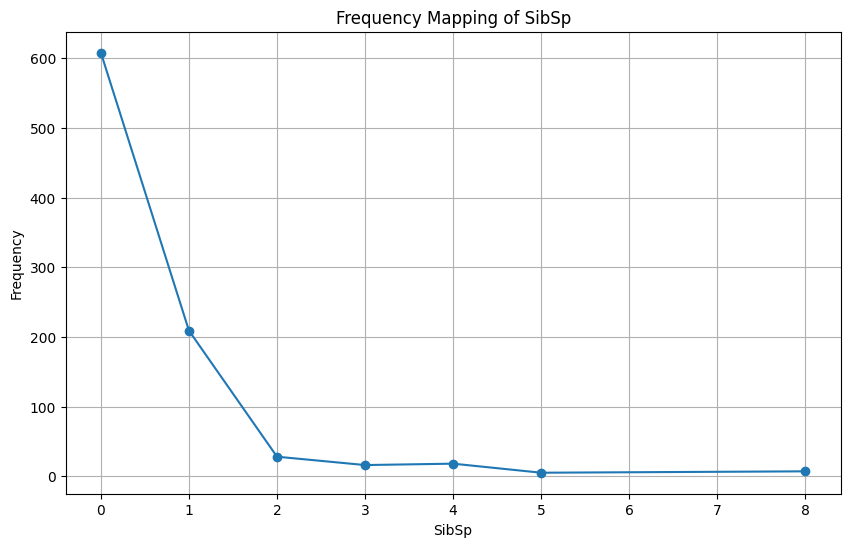

In [42]:
freq_mapping = df['SibSp'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(freq_mapping.index, freq_mapping.values, marker='o')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Frequency Mapping of SibSp')
plt.grid(True)
plt.show()

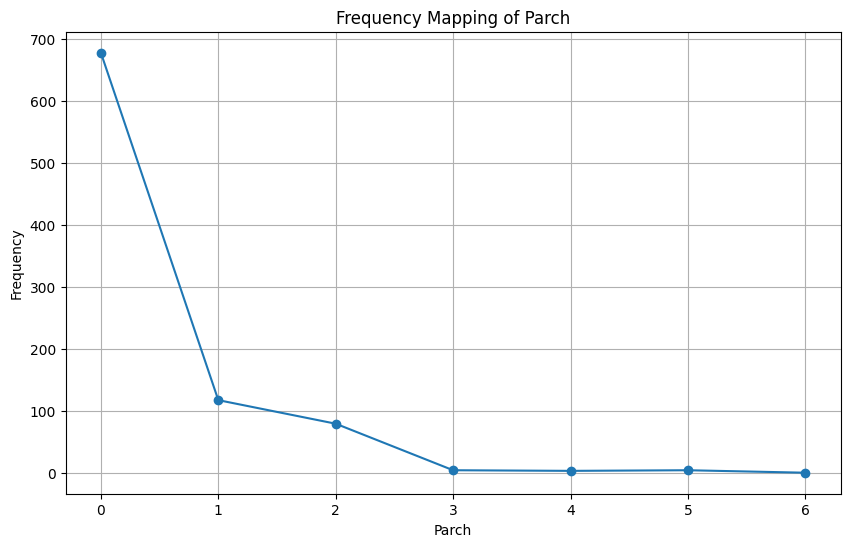

In [43]:
freq_mapping = df['Parch'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(freq_mapping.index, freq_mapping.values, marker='o')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Frequency Mapping of Parch')
plt.grid(True)
plt.show()

In [44]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [45]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [46]:
df["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [47]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

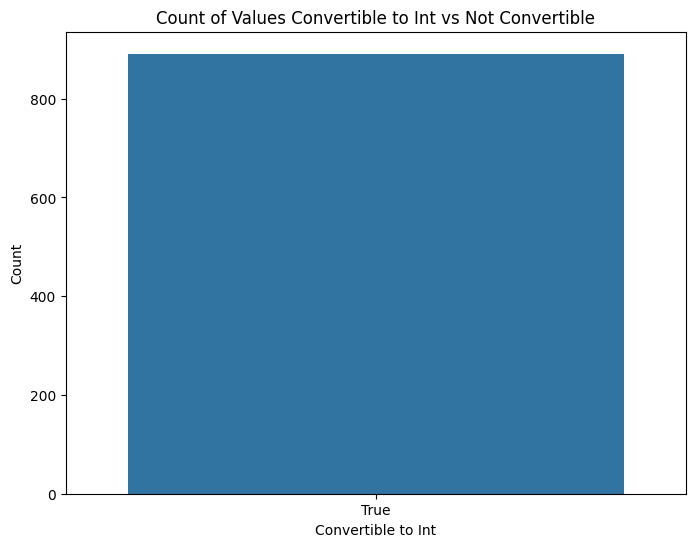

In [48]:
# Function to check if a value can be converted to an integer
def is_convertible_to_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Apply the function to the column and create a new column
df['ConvertibleToInt'] = df['Fare'].apply(is_convertible_to_int)

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='ConvertibleToInt', data=df)
plt.xlabel('Convertible to Int')
plt.ylabel('Count')
plt.title('Count of Values Convertible to Int vs Not Convertible')
plt.show()

df.drop("ConvertibleToInt" , axis = 1 , inplace = True)

/var/folders/_r/wzx98rg54ml36pgjzqvg5tm40000gn/T/ipykernel_22361/2242416424.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cabin', data=df, palette='viridis')  # You can choose a different color palette


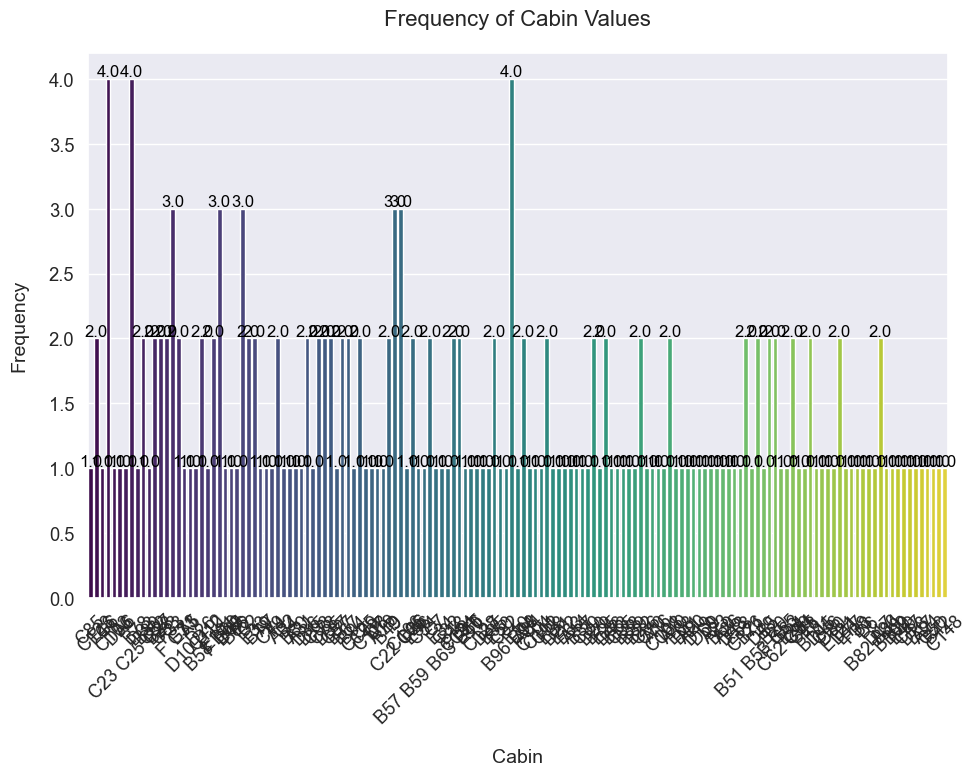

In [50]:
# Assuming df is your DataFrame containing the data

# Increase figure size and adjust font sizes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# Create the bar plot with improved aesthetics
ax = sns.countplot(x='Cabin', data=df, palette='viridis')  # You can choose a different color palette
ax.set_xlabel('Cabin', fontsize=14, labelpad=15)  # Adjust label font size and padding
ax.set_ylabel('Frequency', fontsize=14, labelpad=15)  # Adjust label font size and padding
ax.set_title('Frequency of Cabin Values', fontsize=16, pad=20)  # Adjust title font size and padding
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add value annotations on top of bars (optional)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout()  # Adjust spacing for labels and titles
plt.show()

In [51]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

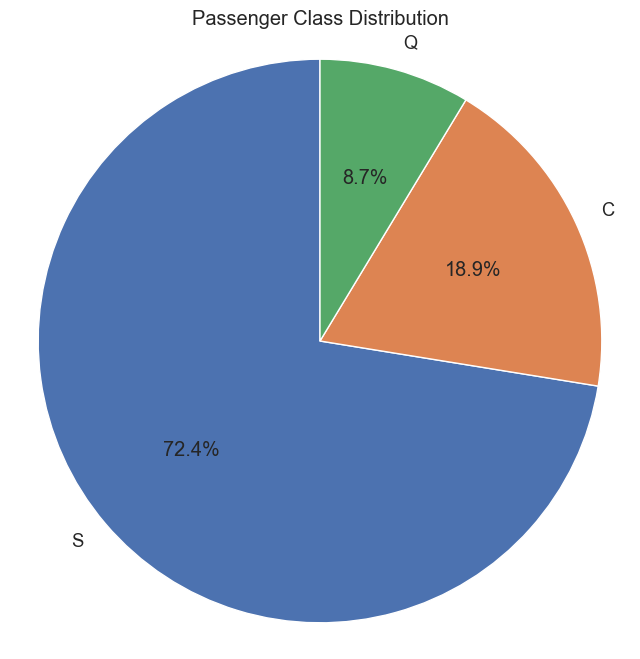

In [52]:
class_counts = df['Embarked'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Passenger Class Distribution')
plt.show()

In [53]:
#rename id, drop name
df["Id"] = df["PassengerId"]
df.drop("PassengerId" , axis = 1 , inplace = True)
df.drop("Name" , axis =1  , inplace = True)

In [55]:
# rearranging the columns 
df = df[['Id', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' , "Survived"]]

In [56]:
rom sklearn.preprocessing import LabelEncoder

df['Embarked'] = df['Embarked'].fillna("0")
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df["Sex"] = encoder.fit_transform(df["Sex"])

SyntaxError: invalid syntax (2760169679.py, line 1)

In [57]:
''' HEATMAP OF PEARSON CORRELATION'''

corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'male'

In [61]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

NameError: name 'X_train' is not defined

In [62]:
y_test.head()

NameError: name 'y_test' is not defined

In [60]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

NameError: name 'X_train' is not defined

In [58]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [59]:
accuracy(X_test, y_test, W, B)

NameError: name 'X_test' is not defined